# Tutorial5: graphs on the training set - (GS)

This tutorial graphs the training models for the feature selection methods, and displays the location of the best 50 features.

---

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
import matplotlib.pyplot as plt

In [2]:
lr = LogisticRegression()
models = [[lr, 'lr', 14]]

In [3]:
import json

In [4]:
with open('ml_gs_rfs.txt') as f:
    data = f.read()
    
ml_dicts = json.loads(data)

with open('ml_gs_sfs.txt') as f:
    data = f.read()
    
ml_dicts6 = json.loads(data)

---

In [5]:
from source.calculate_jack import jack_SD # importing the baseline code from source.basline file

In [6]:
def acc (ml_dicts, models):
    arr_all = []
    for m, d in zip (models, ml_dicts.keys()):
        acc_arr = [] 
        sd_arr = [] 

        # print(ml_dicts[d])
        for key in ml_dicts[d].keys():
            acc_arr.append(ml_dicts[d][key][ 'tot_acc' ]) # append total accuracy to an array
            sd_train = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_train' ]) ), ml_dicts[d][key][ 'jack_train' ])[0]
            sd_test = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_test' ]) ), ml_dicts[d][key][ 'jack_test' ])[0]
            sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
            sd_arr.append(sd) # append sd_arr to an array
        arr_all.append([ list(ml_dicts[d].keys()), acc_arr, sd_arr])    
    return  arr_all   

In [7]:
arr_all = acc(ml_dicts, models)
arr_all6 = acc(ml_dicts6, models)

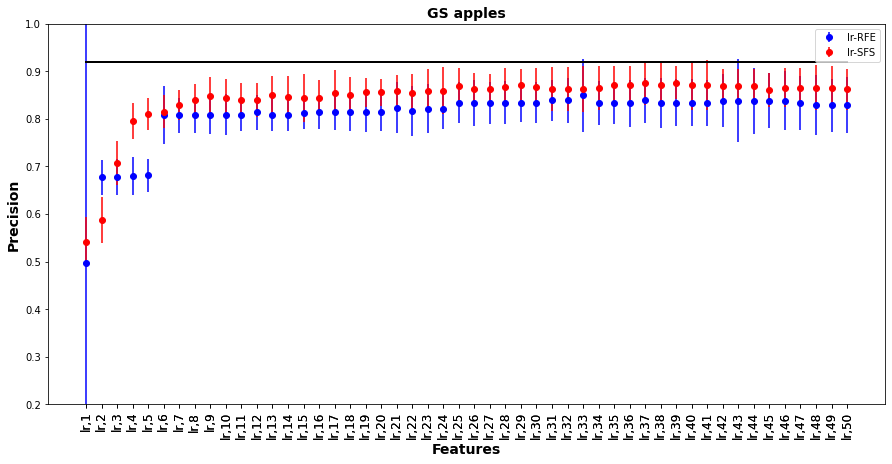

In [8]:
plt.figure(figsize=(15, 7))
plt.title("GS apples", fontweight ='bold', fontsize =14)    
plt.xlabel("Features", fontweight ='bold', fontsize =14)
plt.ylabel("Precision", fontweight ='bold', fontsize =14)

count = 0
n = 4

space = []
tickFeat = []

for result, model in zip(arr_all, models):
    a = np.linspace(n*count, n*(1+count)-2,50)
    # print(a)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1]+"-RFE", color = 'blue')
    count += 1
count = 0
    
for result, model in zip(arr_all6, models):
    a = np.linspace(n*count, n*(1+count)-2,50)
    # print(a)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1]+"-SFS", color = 'red')
    count += 1

plt.plot(np.array(space),[0.9187]*100, color = 'Black')        
plt.xticks(space, tickFeat, rotation = 'vertical',  fontsize =12)
plt.ylim(.2, 1)
plt.legend()

plt.show()

---

In [2]:

# imp_freq = [1309.415, 894.322, 894.014, 1310.076, 1310.738, 1500.371, 1308.754, 894.631, 1308.093, 895.867, 1307.433, 1503.852, 896.177, 1306.774, 1304.801, 896.487, 1306.116, 900.535, 1311.401, 1501.239, 1312.065, 905.884, 1312.729, 1499.503, 2480.996, 1507.349, 1305.458, 898.351, 1304.145, 906.201, 1508.226, 1303.49, 907.47, 1302.834, 1302.18, 1506.473, 905.567, 1301.526, 900.222, 1313.394, 1502.98, 2495.323, 1299.569, 898.662, 1504.725, 1300.221, 907.787, 1300.873, 1298.918, 1505.598]
imp_freq6 = [2473.894, 1356.693, 872.355, 1411.345, 1292.443, 1150.24, 1505.598, 889.719, 1870.592, 2500.136, 1180.62, 883.052, 1201.409, 2432.121, 2436.692, 1391.648, 1029.643, 2387.33, 1321.427, 1846.61, 2455.152, 2438.985, 2409.517, 2396.155, 1124.302, 2459.811, 1125.278, 2414.004, 2400.593, 1115.594, 2372.041, 2389.531, 2398.373, 1015.527, 1851.886, 2402.818, 2407.28, 2405.047, 2434.404, 2469.182, 1128.216, 1853.21, 1126.745, 1016.323, 2425.295, 2416.254, 2391.735, 2418.508, 2429.841, 2423.029]

5
[2473.894, 1356.693, 872.355, 1411.345, 1292.443, 1150.24, 1505.598, 889.719, 1870.592, 2500.136]
4
[1180.62, 883.052, 1201.409, 2432.121, 2436.692, 1391.648, 1029.643, 2387.33, 1321.427, 1846.61]
3
[2455.152, 2438.985, 2409.517, 2396.155, 1124.302, 2459.811, 1125.278, 2414.004, 2400.593, 1115.594]
2
[2372.041, 2389.531, 2398.373, 1015.527, 1851.886, 2402.818, 2407.28, 2405.047, 2434.404, 2469.182]
1
[1128.216, 1853.21, 1126.745, 1016.323, 2425.295, 2416.254, 2391.735, 2418.508, 2429.841, 2423.029]


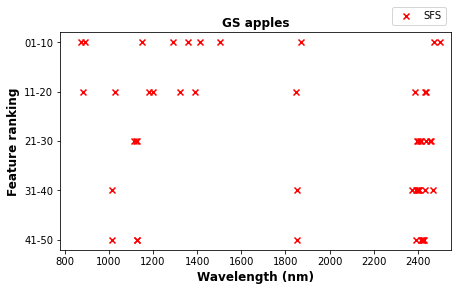

In [3]:
plt.rcParams["figure.figsize"] = (7,4)
# plt.xlabel("Features", fontweight ='bold', fontsize =12)
# plt.ylabel("Precision", fontweight ='bold', fontsize =12)

arrr= [0, 10, 20, 30, 40, 50]
colrs = ['red', 'blue', 'green', 'yellow']
for i in range (5):
    print((5-i))
    print(imp_freq6[arrr[i]:arrr[i+1]])
    
    if i  == 0:
        # plt.scatter( imp_freq[arrr[i]:arrr[i+1]],  np.zeros(10)+(5-i), color = 'blue', label ="RFE", marker = 'x')
        plt.scatter( imp_freq6[arrr[i]:arrr[i+1]], np.zeros(10)+(5-i), color = 'red', label ="SFS", marker = 'x')
    else:
        # plt.scatter( imp_freq[arrr[i]:arrr[i+1]], np.zeros(10)+(5-i), color = 'blue', marker = 'x')
        plt.scatter( imp_freq6[arrr[i]:arrr[i+1]], np.zeros(10)+(5-i), color = 'red', marker = 'x' )
     
plt.xlim(780, 2550)
ylabels = ['41-50', '31-40', '21-30', '11-20','01-10'  ]
plt.yticks([1,2,3,4,5], ylabels)

plt.title("GS apples", fontweight ='bold', fontsize =12)    
plt.xlabel("Wavelength (nm)", fontweight ='bold', fontsize =12)
plt.ylabel("Feature ranking", fontweight ='bold', fontsize =12)
plt.legend(bbox_to_anchor =(1, 1.14))    
plt.show()

---